In [1]:
import pickle
def load_variavle(filename):
  f=open(filename,'rb')
  r=pickle.load(f)
  f.close()
  return r

In [2]:
data = load_variavle('slices.pkl')
print(data)

[array([[13.064,  6.086, 12.   , ...,  0.   ,  0.   ,  0.   ],
       [12.116,  7.015,  7.   , ...,  1.   ,  0.   ,  0.   ],
       [13.945,  6.999, 15.   , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [20.063, 24.964,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [19.007, 25.045,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [21.957, 25.871,  5.   , ...,  1.   ,  0.   ,  0.   ]]), array([[17.907,  4.967,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [18.965,  5.003,  7.   , ...,  0.   ,  0.   ,  0.   ],
       [18.954,  5.995,  5.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [21.874, 24.852,  4.   , ...,  0.   ,  0.   ,  0.   ],
       [23.096, 24.93 ,  2.   , ...,  0.   ,  0.   ,  0.   ],
       [24.076, 25.951,  1.   , ...,  0.   ,  0.   ,  0.   ]]), array([[21.91 ,  8.945, 16.   , ...,  0.   ,  1.   ,  0.   ],
       [23.14 ,  9.057, 11.   , ...,  0.   ,  0.   ,  0.   ],
       [16.94 ,  9.036,  2.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [15.   , 25.056, 20.  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
import sklearn

In [4]:
for sample in data:
    print(sample.shape)

(254, 8000)
(250, 7715)
(263, 7455)
(262, 7573)


In [5]:
for sample in data:
    print('[{},{}]'.format(sample.min(),sample.max()))

[0.0,204.0]
[0.0,264.0]
[0.0,308.0]
[0.0,390.0]


In [6]:
print(data[0].shape)
sample = data[0]
xy = sample[:,:2]
x = xy[:,0]
y = xy[:,1]
sample.shape

(254, 8000)


(254, 8000)

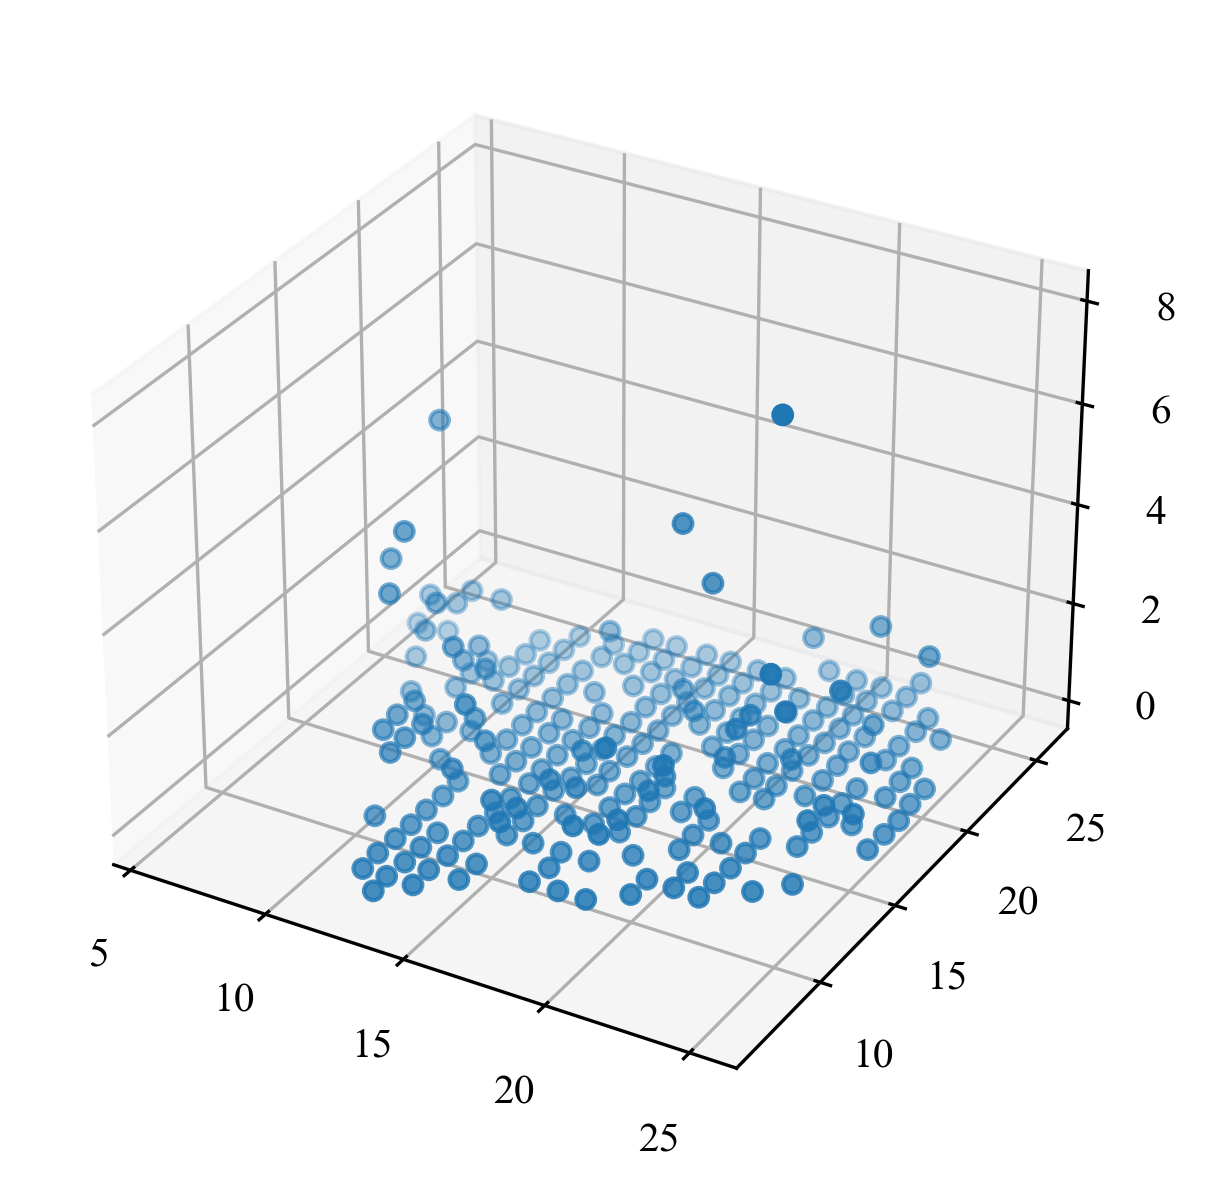

In [7]:
fig = plt.figure(dpi=300)
ax = plt.axes(projection='3d')
ax.scatter(x,y,sample[:,10])


In [8]:
xy = list(zip(x,y))

In [9]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import cm
#%matplotlib qt5
h = sample[:,10]
xy_train, xy_test, h_train, h_test = train_test_split(xy,h, test_size=0.2)
len(xy_train),len(xy_test),len(h_train),len(h_test)

(203, 51, 203, 51)

/Users/fanli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.21488e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


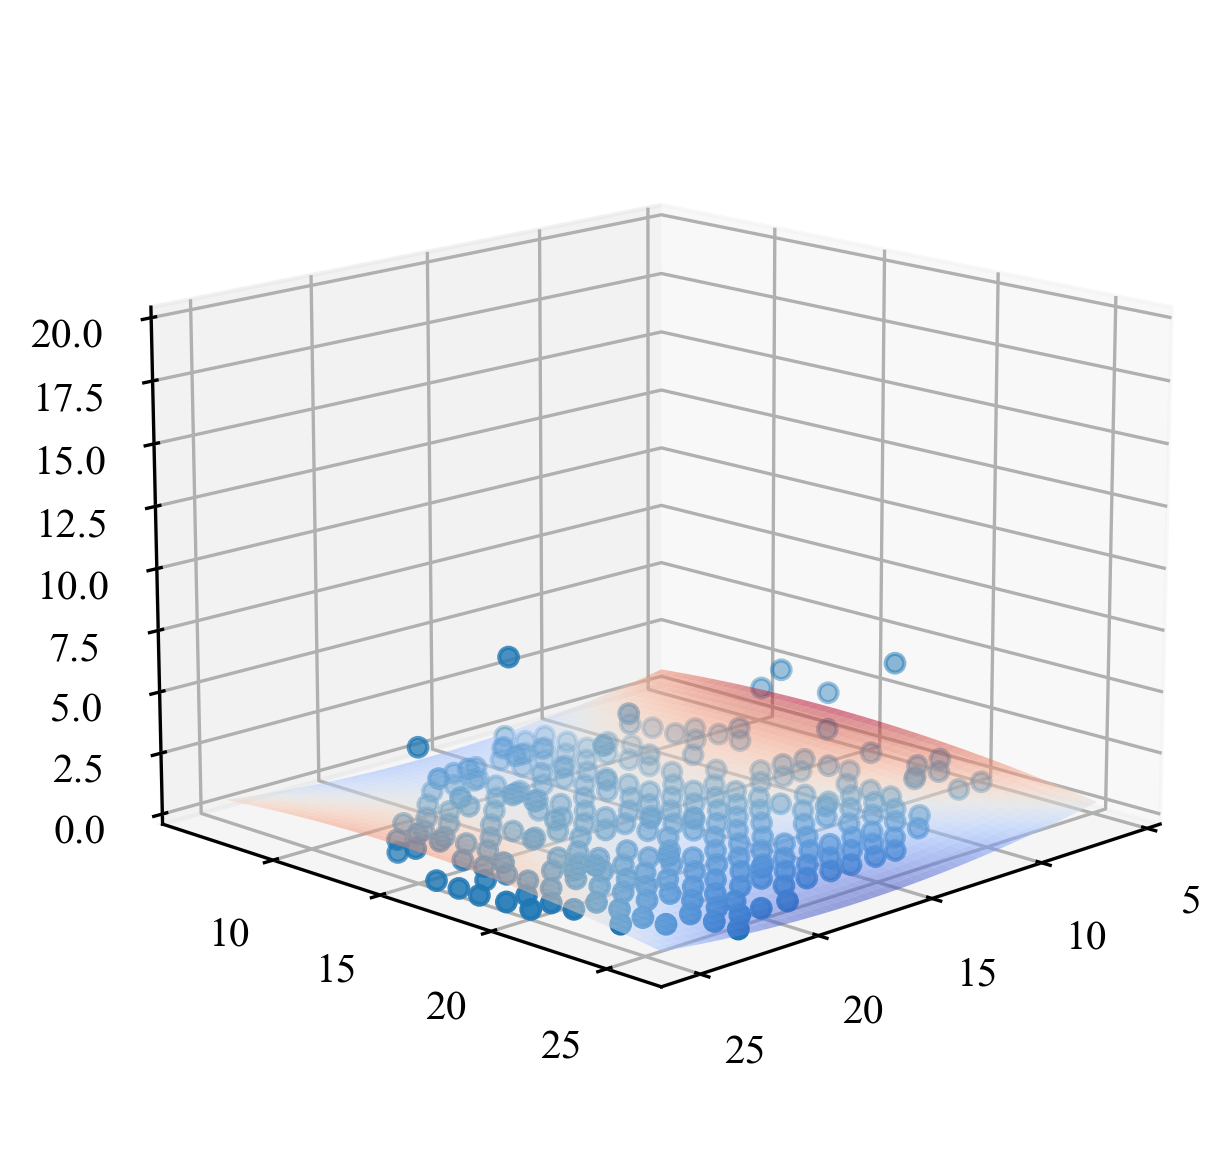

In [10]:
# 创建一个Ridge模型并拟合数据
model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=1e-10))
#model = Ridge()
model.fit(xy_train, h_train)
# 预测新的高度值
x_new = np.linspace(x.min(), x.max(), num=50)
y_new = np.linspace(y.min(), y.max(), num=50)
X_new, Y_new = np.meshgrid(x_new, y_new)
h_new = model.predict(np.column_stack((X_new.ravel(), Y_new.ravel()))).reshape(X_new.shape)

# 绘制二维曲面
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0,20)
ax.plot_surface(X_new, Y_new, h_new, alpha=0.5,cmap=cm.coolwarm)
ax.scatter(x,y,sample[:,10])
ax.view_init(elev=15, azim=45)
plt.show()

In [11]:
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

In [12]:
evaluate_regression(h_test,model.predict(xy_test))

(1.460821225087169, 1.2086443749454052, 0.05104994843862931)

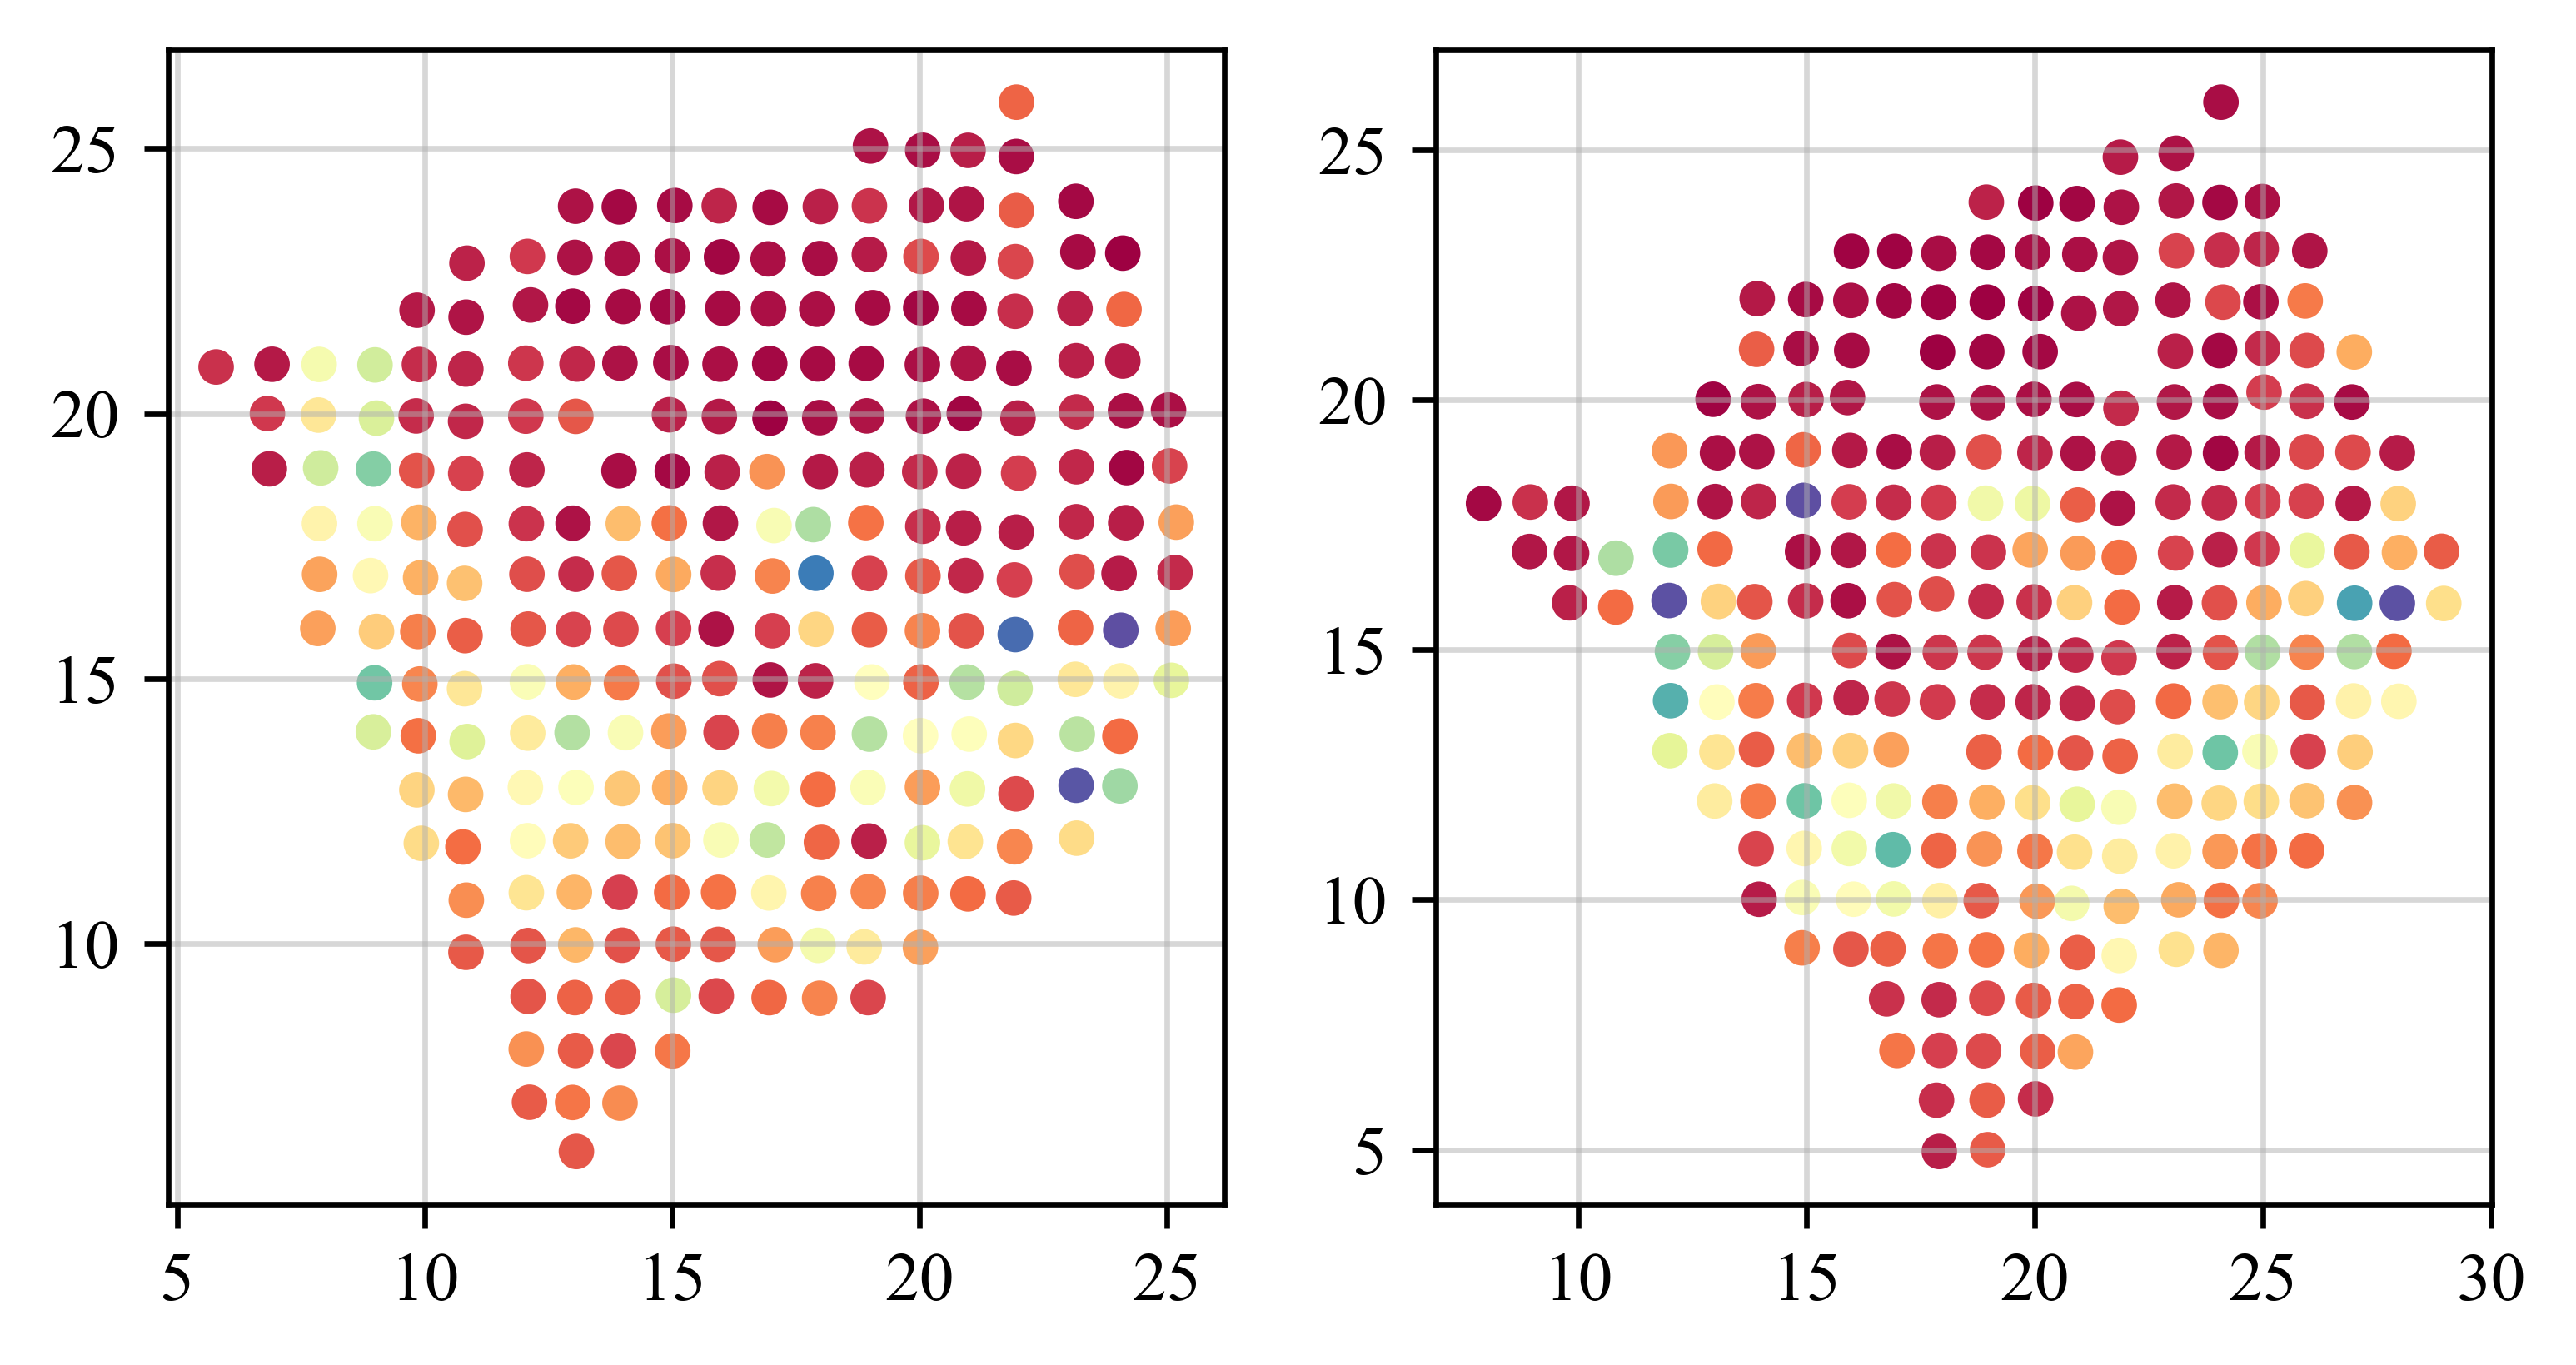

In [13]:
import seaborn as sns
fig,ax = plt.subplots(1,2,figsize=(6,3),dpi=600)
for i in [0,1]:
    sample = data[i]
    gene = sample[:,3:]
    xy = sample[:,:2]
    x = xy[:,0]
    y = xy[:,1]
    ax[i].grid(alpha=0.5)
    ax[i].scatter(x,y,c=np.average(gene,axis=1),cmap = sns.color_palette("Spectral", as_cmap=True),s=17)
#         ax[i][j].set_xlim(5,30)
#         ax[i][j].set_ylim(4,27)
plt.savefig('Figure/preShow.jpg')


In [14]:
plt.show()

In [30]:
xy.shape,sample.shape,sample[:,j].shape,sample[i].shape

((250, 2), (250, 7715), (250,), (7715,))

In [37]:
def get_dis(a,b):
    return np.log10(np.sum(np.square(a,b)))

In [38]:
dis_mat = np.zeros(shape=(250,250),dtype=np.float32)

In [39]:
for i in range(250):
    for j in range(250):
        dis_mat[i][j] += get_dis(sample[i],sample[j])
        

In [40]:
dis_mat

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]], dtype=float32)